In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
file = "C:\\Users\\jun93\\Desktop\\Spring 2020\\CS 301"

In [163]:
df = pd.read_csv(file+"\\BushFire.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-11,6564.299805,6614.600098,6564.299805,6606.799805,6606.799805,526900
1,2019-10-14,6622.500000,6676.200195,6622.500000,6642.600098,6642.600098,489200
2,2019-10-15,6637.000000,6657.399902,6621.899902,6652.000000,6652.000000,504800
3,2019-10-16,6660.000000,6737.799805,6659.700195,6736.500000,6736.500000,626500
4,2019-10-17,6730.500000,6737.399902,6681.399902,6684.700195,6684.700195,871200
...,...,...,...,...,...,...,...
67,2020-01-17,7041.799805,7088.100098,7041.799805,7064.100098,7064.100098,500300
68,2020-01-20,7064.100098,7092.500000,7064.100098,7079.500000,7079.500000,423400
69,2020-01-21,7079.500000,7079.500000,7040.700195,7066.299805,7066.299805,480900
70,2020-01-22,7066.299805,7144.899902,7062.200195,7132.700195,7132.700195,602000


In [164]:
df_fil = df.filter(["High","Low","Volume"])
df_fil

,High,Low,Volume
0,6614.600098,6564.299805,526900
1,6676.200195,6622.500000,489200
2,6657.399902,6621.899902,504800
3,6737.799805,6659.700195,626500
4,6737.399902,6681.399902,871200
...,...,...,...
67,7088.100098,7041.799805,500300
68,7092.500000,7064.100098,423400
69,7079.500000,7040.700195,480900
70,7144.899902,7062.200195,602000


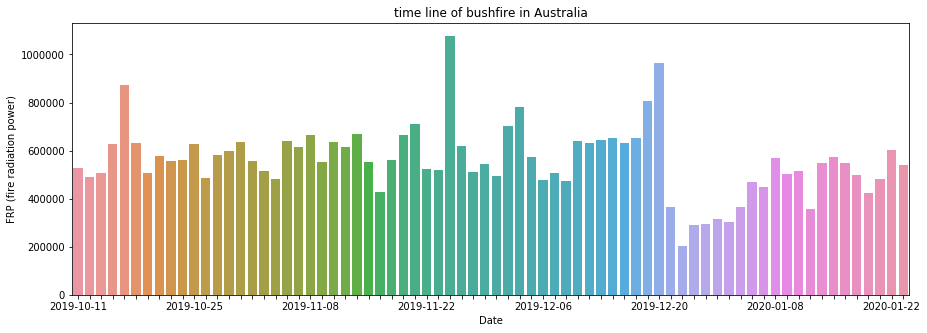

In [165]:
ax = sns.barplot(x='Date',y='Volume',data=df)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.gcf().set_size_inches(15,5)
plt.xlabel("Date")
plt.ylabel('FRP (fire radiation power)')
plt.title("time line of bushfire in Australia")
plt.show()

In [166]:
#fire_nrt_m6 = pd.read_csv(file+"\\fire_archive_M6_101673.csv")
#fire_archive_m6 = pd.read_csv(file+"\\fire_archive_M6_101673.csv")
fire_nrt_v1 = pd.read_csv(file+"\\fire_nrt_V1_101674.csv")
fire_archive_v1 = pd.read_csv(file+"\\fire_archive_V1_101674.csv")

type(fire_nrt_v1)

pandas.core.frame.DataFrame

In [167]:
df_merge = pd.concat([fire_archive_v1, fire_nrt_v1],sort=True)
data = df_merge
data.head()

,acq_date,acq_time,bright_ti4,bright_ti5,confidence,daynight,frp,instrument,latitude,longitude,satellite,scan,track,type,version
0,2019-09-01,304,341.1,293.7,n,NaN,4.4,VIIRS,-37.48861,149.63156,N,0.41,0.60,0.0,1
1,2019-09-01,305,328.5,298.5,l,NaN,2.1,VIIRS,-34.46110,150.88142,N,0.33,0.55,2.0,1
2,2019-09-01,305,341.1,295.3,n,NaN,6.4,VIIRS,-33.94823,151.21292,N,0.62,0.54,0.0,1
3,2019-09-01,305,328.5,298.1,n,NaN,2.1,VIIRS,-34.45618,150.87723,N,0.33,0.55,2.0,1
4,2019-09-01,306,367.0,302.4,h,NaN,19.3,VIIRS,-31.60223,150.15147,N,0.34,0.56,0.0,1


In [168]:
df_filter = data.filter(["latitude","longitude","acq_date","frp"])
df_filter.head()

,latitude,longitude,acq_date,frp
0,-37.48861,149.63156,2019-09-01,4.4
1,-34.46110,150.88142,2019-09-01,2.1
2,-33.94823,151.21292,2019-09-01,6.4
3,-34.45618,150.87723,2019-09-01,2.1
4,-31.60223,150.15147,2019-09-01,19.3


In [169]:
df = df_filter[df_filter['acq_date']>='2019-11-01']
df.head()

,latitude,longitude,acq_date,frp
141333,-30.90384,148.78645,2019-11-01,9.4
141334,-29.93590,149.08118,2019-11-01,8.1
141335,-30.90112,148.78107,2019-11-01,5.2
141336,-31.21953,147.99135,2019-11-01,4.8
141337,-30.90465,148.78191,2019-11-01,5.2


In [170]:
data_topaffected = df.sort_values(by='frp',ascending=False)
data_topaffected.head(10)

,latitude,longitude,acq_date,frp
942985,-36.97858,146.71938,2020-01-08,10717.2
943024,-35.89541,136.54585,2020-01-08,5611.8
943059,-35.79238,136.59879,2020-01-08,4948.8
894088,-36.77020,148.00307,2020-01-04,4156.6
943016,-35.89769,136.55919,2020-01-08,3736.3
943036,-35.88688,137.07683,2020-01-08,3501.9
943035,-35.88832,137.08549,2020-01-08,3497.9
943017,-35.89693,136.55476,2020-01-08,3372.0
943020,-35.89618,136.55032,2020-01-08,3372.0
943076,-35.80969,136.60056,2020-01-08,3282.1


In [171]:
dfdate = df[['acq_date','frp']].set_index('acq_date')
dfdate_highest = dfdate.groupby('acq_date').sum().sort_values(by='frp',ascending=False)
dfdate_highest.head(10)

,frp
acq_date,
2020-01-04,1653384.1
2019-12-30,883598.6
2019-11-08,542117.9
2019-12-29,529525.8
2020-01-02,520606.0
2019-12-21,344399.0
2019-12-19,333303.5
2020-01-03,317426.7
2020-01-01,312001.9


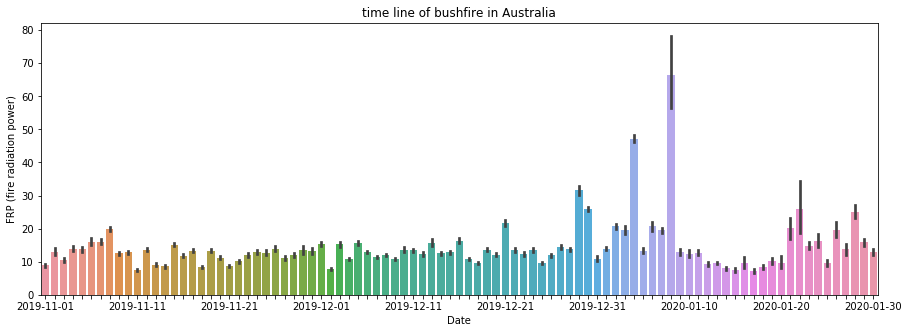

In [172]:
ax = sns.barplot(x='acq_date',y='frp',data=df)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#plt.gcf().autofmt_xdate()
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.gcf().set_size_inches(15,5)
plt.xlabel("Date")
plt.ylabel('FRP (fire radiation power)')
plt.title("time line of bushfire in Australia")
plt.show()